In [1]:
import os
import json

text_dir = "../data/text/Subtask_2_train.json"
anno = json.load(open(text_dir))

In [2]:
all_pairs = []

for a in anno:
    all_pairs.extend(a["emotion-cause_pairs"])

In [5]:
total = len(all_pairs)

In [12]:
self_causes = 0
imm_causes = 0

for e,c in all_pairs:
    if e.split("_")[0] == c:
        self_causes += 1
    if int(e.split("_")[0])-1 == int(c):
        imm_causes += 1
        
print("Num of self_causes:",self_causes)
print("As a ratio of total: {:.2f}%".format((self_causes/total)*100))
print("\nNum of immediate causes:", imm_causes)
print("As a ratio of total: {:.2f}%".format((imm_causes/total)*100))

Num of self_causes: 4892
As a ratio of total: 49.95%

Num of immediate causes: 2945
As a ratio of total: 30.07%


In [90]:
num_emotional_utt = 0
isolated_self_causes = []
non_isolated_self_causes = []
non_self_cause_single = []
non_self_causes = []
no_cause = []
num_cause_dist = []

for i, a in enumerate(anno):
    emotional_utt = set()
    for utt in a["conversation"]:
        if utt["emotion"] != "neutral":
            num_emotional_utt += 1
            emotional_utt.add(str(utt["utterance_ID"]))
    pair = {}
    for e, c in a["emotion-cause_pairs"]:
        e = e.split("_")[0]
        if e in pair: pair[e].append(c)
        else: pair[e] = [c]

    for e, causes in pair.items():
        num_cause_dist.append(len(causes))
        if len(causes) == 1:
            if e == causes[0]:
                isolated_self_causes.append([i, a["conversation"][int(e)-1],(e,causes)])
            else:
                non_self_cause_single.append([i,a["conversation"][int(e)-1],(e,causes)])
        else:
            if e in causes:
                non_isolated_self_causes.append([i, a["conversation"][int(e)-1],(e,causes)])
            else:
                non_self_causes.append([i, a["conversation"][int(e)-1],(e,causes)])
    
    for e in emotional_utt:
        if e not in pair:
            no_cause.append([i, a["conversation"][int(e)-1]])

num_non_self = len(non_self_cause_single) + len(non_self_causes)
print("Number of emotion utterances:", num_emotional_utt)
print("Number of self causal utterances: {} (isolated: {} multiple: {})".format(self_causes, len(isolated_self_causes), len(non_isolated_self_causes)))
print("Number of non self causal utterances: {} (isolated: {} multiple: {})".format(num_non_self, len(non_self_cause_single), len(non_self_causes)))
print("Number of no cause utterances:", len(no_cause))

print("\nProbability that an utterance is self-causal: {:.4f}".format(self_causes/num_emotional_utt))  
print("Probability that self-cause is isolated: {:.4f}".format(len(isolated_self_causes)/self_causes)) 
print("Probability that self-cause is not isolated: {:.4f}".format(len(non_isolated_self_causes)/self_causes))

print("\nProbability that an utterance is not self-causal: {:.4f}".format(num_non_self/num_emotional_utt))
print("Probability that non-self-causal utterance is isolated: {:.4f}".format(len(non_self_cause_single)/num_non_self))
print("Probability that non-self-causal utterance is not isolated: {:.4f}".format(len(non_self_causes)/num_non_self))

print("\nProbabilty that an utterance has no cause: {:.4f}".format(len(no_cause)/num_emotional_utt))
print()

Number of emotion utterances: 7690
Number of self causal utterances: 4892 (isolated: 3154 multiple: 1738)
Number of non self causal utterances: 2189 (isolated: 1760 multiple: 429)
Number of no cause utterances: 609

Probability that an utterance is self-causal: 0.6362
Probability that self-cause is isolated: 0.6447
Probability that self-cause is not isolated: 0.3553

Probability that an utterance is not self-causal: 0.2847
Probability that non-self-causal utterance is isolated: 0.8040
Probability that non-self-causal utterance is not isolated: 0.1960

Probabilty that an utterance has no cause: 0.0792



In [74]:
self_causes_with_later = []
for idx, utt, (e, causes) in non_isolated_self_causes:
    later = False
    for c in causes:
        if int(c) > int(e): later = True
    if later: self_causes_with_later.append([idx, utt, (e, causes)])
    
isolated_later_causes = []
for idx, utt, (e, causes) in non_self_cause_single:
    later = False
    for c in causes:
        if int(c) > int(e): later = True
    if later: isolated_later_causes.append([idx, utt, (e, causes)])
    
non_isolated_non_self_later_causes = []
for idx, utt, (e, causes) in non_self_causes:
    later = False
    for c in causes:
        if int(c) > int(e): later = True
    if later: non_isolated_non_self_later_causes.append([idx, utt, (e, causes)])
    
total_later = len(self_causes_with_later) + len(isolated_later_causes) + len(non_isolated_non_self_later_causes)
print("Number of utterances with later_causes:", total_later)
print("Number of utterances with isolated later cause:", len(isolated_later_causes))
print("Number of self_causal utterance with later causes:", len(self_causes_with_later))
print("Number of utterances with multiple causes with later cause(s)", len(non_isolated_non_self_later_causes))

print("\nProbability that an utterance has a later cause: {:.4f}".format(total_later/num_emotional_utt))
print("Probaility that an utterance has an isolated later cause: {:.4f}".format(len(isolated_later_causes)/total_later))
print("Probaility that self-causal utterance has a later cause: {:.4f}".format(len(self_causes_with_later)/len(non_isolated_self_causes)))
print("Probabilty that a non self-causal utterance has multiple causes with some as later cause(s): {:.4f}".format(len(non_isolated_non_self_later_causes)/len(non_self_causes)))

Number of utterances with later_causes: 177
Number of utterances with isolated later cause: 0
Number of self_causal utterance with later causes: 130
Number of utterances with multiple causes with later cause(s) 47

Probability that an utterance has a later cause: 0.0230
Probaility that an utterance has an isolated later cause: 0.0000
Probaility that self-causal utterance has a later cause: 0.0748
Probabilty that a non self-causal utterance has multiple causes with some as later cause(s): 0.1096


In [89]:
for emo in ["anger", "joy", "sadness", "surprise", "disgust", "fear"]:
    num_emotional_utt = 0
    isolated_self_causes_emo = []
    non_isolated_self_causes_emo = []
    non_self_cause_single_emo = []
    non_self_causes_emo = []
    no_cause_emo = []

    for idx, utt, (e, causes) in isolated_self_causes:
        if utt["emotion"] ==  emo:
            isolated_self_causes_emo.append([idx, utt, (e,causes)])
            num_emotional_utt += 1
    for idx, utt, (e, causes) in non_isolated_self_causes:
        if utt["emotion"] ==  emo:
            non_isolated_self_causes_emo.append([idx, utt, (e,causes)])
            num_emotional_utt += 1
    for idx, utt, (e, causes) in non_self_cause_single:
        if utt["emotion"] ==  emo:
            non_self_cause_single_emo.append([idx, utt, (e,causes)])
            num_emotional_utt += 1
    for idx, utt, (e, causes) in non_self_causes:
        if utt["emotion"] ==  emo:
            non_self_causes_emo.append([idx, utt, (e,causes)])
            num_emotional_utt += 1
    for idx, utt in no_cause:
        if utt["emotion"] ==  emo:
            no_cause_emo.append([idx, utt])
            num_emotional_utt += 1

    num_non_self = len(non_self_cause_single_emo) + len(non_self_causes_emo)
    num_self = len(isolated_self_causes_emo) + len(non_isolated_self_causes_emo)
    print("Number of {} utterances: {}".format(emo, num_emotional_utt))
    print("Number of self causal {} utterances: {} (isolated: {} multiple: {})".format(emo, num_self, len(isolated_self_causes_emo), len(non_isolated_self_causes_emo)))
    print("Number of non self causal {} utterances: {} (isolated: {} multiple: {})".format(emo, num_non_self, len(non_self_cause_single_emo), len(non_self_causes_emo)))
    print("Number of no cause {} utterances: {}".format(emo, len(no_cause_emo)))

    print("\nProbability that {} utterance is self-causal: {:.4f}".format(emo, num_self/num_emotional_utt))  
    print("Probability that self-cause is isolated: {:.4f}".format(len(isolated_self_causes_emo)/num_self)) 
    print("Probability that self-cause is not isolated: {:.4f}".format(len(non_isolated_self_causes_emo)/num_self))

    print("\nProbability that {} utterance is not self-causal: {:.4f}".format(emo, num_non_self/num_emotional_utt))
    print("Probability that non-self-causal utterance is isolated: {:.4f}".format(len(non_self_cause_single_emo)/num_non_self))
    print("Probability that non-self-causal utterance is not isolated: {:.4f}".format(len(non_self_causes_emo)/num_non_self))

    print("\nProbabilty that {} utterance has no cause: {:.4f}".format(emo, len(no_cause_emo)/num_emotional_utt))
    
    self_causes_with_later = []
    for idx, utt, (e, causes) in non_isolated_self_causes_emo:
        later = False
        for c in causes:
            if int(c) > int(e): later = True
        if later: self_causes_with_later.append([idx, utt, (e, causes)])
        
    isolated_later_causes = []
    for idx, utt, (e, causes) in non_self_cause_single_emo:
        later = False
        for c in causes:
            if int(c) > int(e): later = True
        if later: isolated_later_causes.append([idx, utt, (e, causes)])
        
    non_isolated_non_self_later_causes = []
    for idx, utt, (e, causes) in non_self_causes_emo:
        later = False
        for c in causes:
            if int(c) > int(e): later = True
        if later: non_isolated_non_self_later_causes.append([idx, utt, (e, causes)])
        
    total_later = len(self_causes_with_later) + len(isolated_later_causes) + len(non_isolated_non_self_later_causes)
    print("\nLater Analysis:")
    print("Number of",emo,"utterances with later_causes:", total_later)
    print("Number of",emo,"utterances with isolated later cause:", len(isolated_later_causes))
    print("Number of self_causal",emo,"utterance with later causes:", len(self_causes_with_later))
    print("Number of utterances with multiple causes with later cause(s)", len(non_isolated_non_self_later_causes))

    print("\nProbability that",emo,"utterance has a later cause: {:.4f}".format(total_later/num_emotional_utt))
    print("Probaility that",emo,"utterance has an isolated later cause: {:.4f}".format(len(isolated_later_causes)/total_later))
    print("Probaility that self-causal",emo,"utterance has a later cause: {:.4f}".format(len(self_causes_with_later)/len(non_isolated_self_causes_emo)))
    print("Probabilty that a non self-causal",emo,"utterance has multiple causes with some as later cause(s): {:.4f}".format(len(non_isolated_non_self_later_causes)/len(non_self_causes_emo)))
    print("-"*100,end="\n\n")

Number of anger utterances: 1615
Number of self causal anger utterances: 886 (isolated: 451 multiple: 435)
Number of non self causal anger utterances: 544 (isolated: 389 multiple: 155)
Number of no cause anger utterances: 185

Probability that anger utterance is self-causal: 0.5486
Probability that self-cause is isolated: 0.5090
Probability that self-cause is not isolated: 0.4910

Probability that anger utterance is not self-causal: 0.3368
Probability that non-self-causal utterance is isolated: 0.7151
Probability that non-self-causal utterance is not isolated: 0.2849

Probabilty that anger utterance has no cause: 0.1146

Later Analysis:
Number of anger utterances with later_causes: 113
Number of anger utterances with isolated later cause: 38
Number of self_causal anger utterance with later causes: 58
Number of utterances with multiple causes with later cause(s) 17

Probability that anger utterance has a later cause: 0.0700
Probaility that anger utterance has an isolated later cause: 0.

In [108]:
from collections import Counter

num_self_cause_multiple = []
for idx, utt, (e, causes) in non_isolated_self_causes:
    num_self_cause_multiple.append(len(causes))

num_non_self_cause_multiple = []
for idx, utt, (e, causes) in non_self_causes:
    num_non_self_cause_multiple.append(len(causes))             

print("Self-causal utterance with another causes:", len(non_isolated_self_causes))
for num, count in Counter(num_self_cause_multiple).items():
    print("{} other causes: {} ({:.4f})".format(num-1, count, count/len(non_isolated_self_causes)))
    
print("\nNon Self-causal utterance with another causes:", len(non_isolated_self_causes))
for num, count in Counter(num_non_self_cause_multiple).items():
    print("{} causes: {} ({:.4f})".format(num, count, count/len(non_self_causes)))

Self-causal utterance with another causes: 1738
1 other causes: 1383 (0.7957)
2 other causes: 286 (0.1646)
3 other causes: 62 (0.0357)
7 other causes: 1 (0.0006)
5 other causes: 1 (0.0006)
4 other causes: 5 (0.0029)

Non Self-causal utterance with another causes: 1738
3 causes: 68 (0.1585)
2 causes: 341 (0.7949)
4 causes: 18 (0.0420)
6 causes: 1 (0.0023)
5 causes: 1 (0.0023)


In [113]:
dist_between_emo_cause = []
for a in anno:
    for e, c in a["emotion-cause_pairs"]:
        e = e.split("_")[0]
        dist_between_emo_cause.append(int(e) - int(c))
Counter(dist_between_emo_cause)

Counter({0: 4892,
         1: 2945,
         2: 846,
         3: 350,
         -1: 204,
         4: 164,
         -2: 122,
         5: 102,
         6: 46,
         -3: 27,
         7: 26,
         8: 18,
         -4: 15,
         9: 13,
         10: 5,
         -6: 4,
         -5: 4,
         11: 3,
         -8: 2,
         12: 2,
         -10: 1,
         13: 1,
         14: 1,
         -9: 1})

In [114]:
dist_between_emo_cause = [] # At beginning
for a in anno:
    for e, c in a["emotion-cause_pairs"]:
        e = e.split("_")[0]
        if int(e) == 1:
            dist_between_emo_cause.append(int(e) - int(c))
Counter(dist_between_emo_cause)

Counter({0: 564, -1: 24, -2: 22, -3: 4, -4: 2, -6: 2, -9: 1})

In [115]:
dist_between_emo_cause = [] # At last
for a in anno:
    for e, c in a["emotion-cause_pairs"]:
        e = e.split("_")[0]
        if int(e) == len(a["conversation"]):
            dist_between_emo_cause.append(int(e) - int(c))
Counter(dist_between_emo_cause)

Counter({0: 508,
         1: 354,
         2: 94,
         3: 43,
         4: 23,
         5: 17,
         7: 5,
         6: 5,
         9: 2,
         8: 2,
         12: 1,
         10: 1})

In [104]:
Counter([int(e) - int(c) for e,c in single_other_cause])

Counter({1: 1039,
         2: 158,
         3: 59,
         -1: 49,
         4: 27,
         -2: 22,
         5: 11,
         6: 4,
         7: 3,
         8: 3,
         -3: 3,
         9: 2,
         13: 1,
         -4: 1,
         -5: 1})

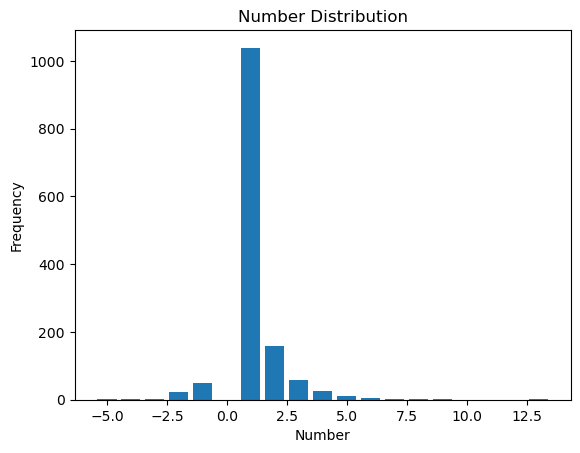

In [102]:
plot_distribution_num([int(e) - int(c) for e,c in single_other_cause])

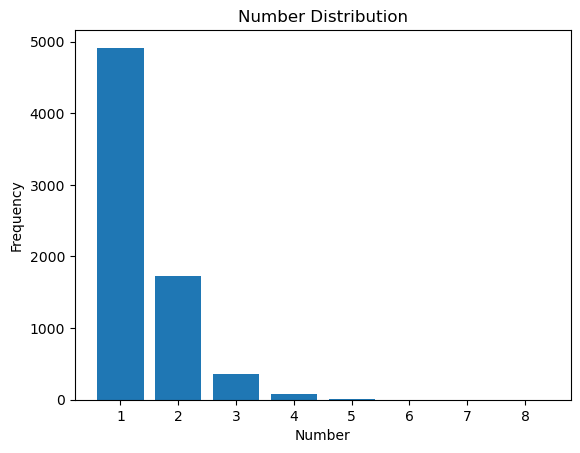

In [95]:
import matplotlib.pyplot as plt
def plot_distribution_num(lst):
    counter = Counter(lst)
    numbers = []
    counts = []

    for num, count in counter.items():
        numbers.append(num)
        counts.append(count)

    plt.bar(numbers, counts)
    plt.title("Number Distribution")
    plt.xlabel("Number") 
    plt.ylabel("Frequency")
    plt.show()

plot_distribution_num(num_cause_dist)

In [93]:
def plot_distribution_emo(lst, ax, title="Emotion Distribution"):
    counter = Counter(lst)
    numbers = []
    counts = []

    for num, count in counter.items():
        numbers.append(num)
        counts.append(count)

    ax.bar(numbers, counts)
    ax.set_title(title)
    ax.set_xlabel("Emotion") 
    ax.set_ylabel("Frequency")

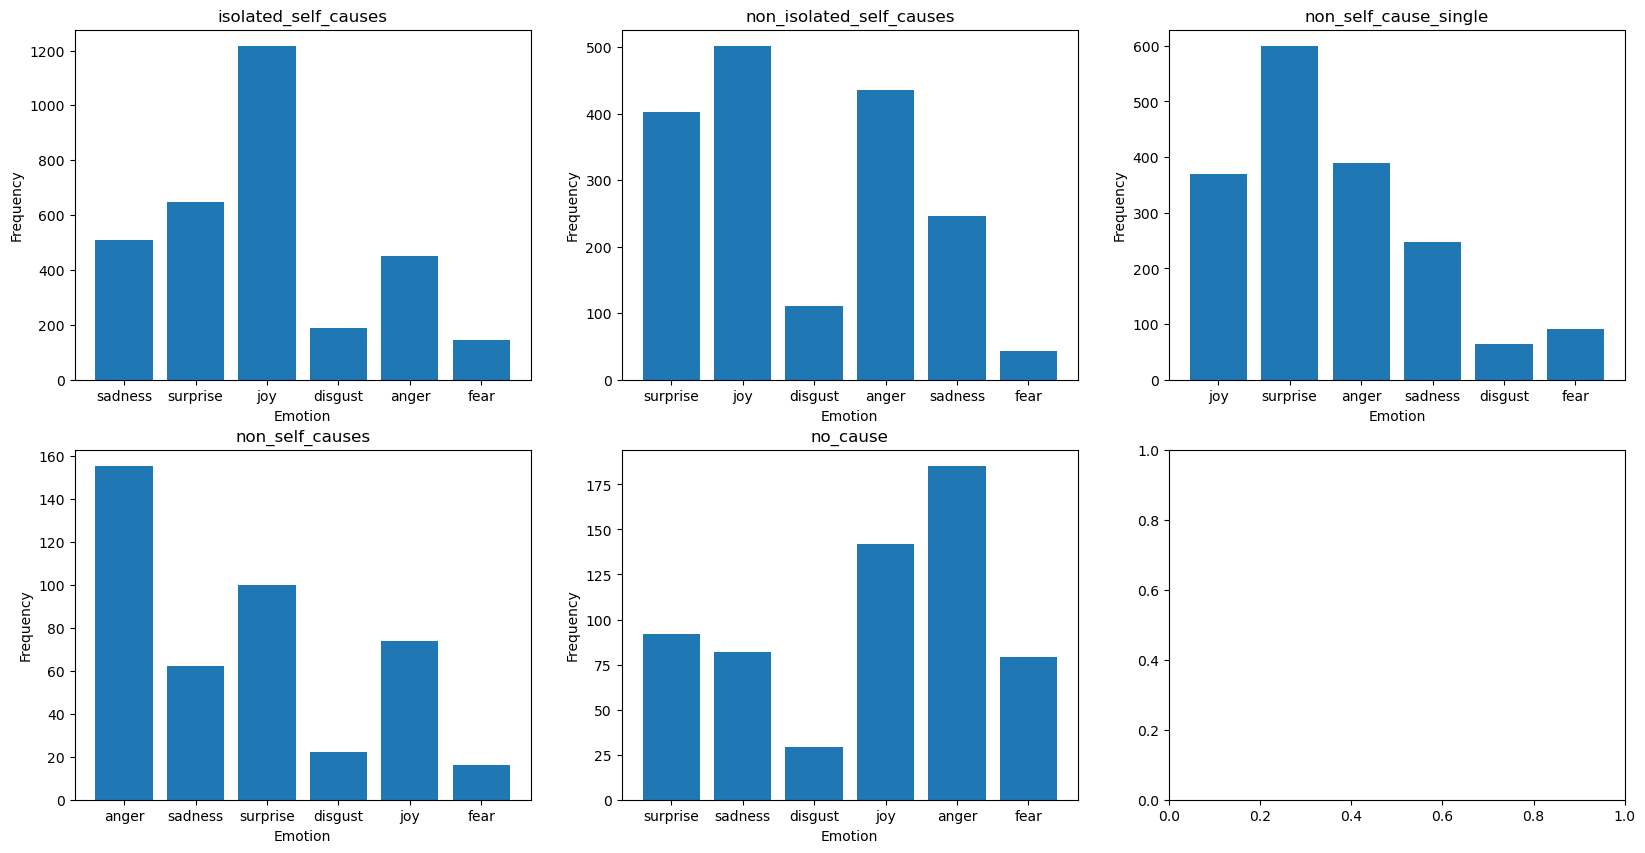

In [94]:
cause_categories = {"isolated_self_causes": isolated_self_causes,
                    "non_isolated_self_causes": non_isolated_self_causes,
                    "non_self_cause_single": non_self_cause_single,
                    "non_self_causes": non_self_causes,
                    "no_cause": no_cause}

causal_lists = list(cause_categories.keys())
fig, axis = plt.subplots(2,3, figsize=(20,10))
k = 0
for i in range(2):
    for j in range(3):
        if k < len(causal_lists):
            plot_distribution_emo([u[1]["emotion"] for u in cause_categories[causal_lists[k]]],
                              axis[i, j], 
                              causal_lists[k])
            k += 1
plt.show()

In [38]:
isolated_self_causes[7:25]

[[7,
  {'utterance_ID': 12,
   'text': 'Yes , and she is very supportive .',
   'speaker': 'Carol',
   'emotion': 'joy',
   'video_name': 'dia8utt12.mp4'}],
 [7,
  {'utterance_ID': 16,
   'text': 'Quack , quack ...',
   'speaker': 'Ross',
   'emotion': 'joy',
   'video_name': 'dia8utt16.mp4'}],
 [9,
  {'utterance_ID': 2,
   'text': 'Oh , not much . I ... I got a job .',
   'speaker': 'Rachel',
   'emotion': 'joy',
   'video_name': 'dia10utt2.mp4'}],
 [9,
  {'utterance_ID': 4,
   'text': 'Why are ... why are you so tanned ?',
   'speaker': 'Rachel',
   'emotion': 'surprise',
   'video_name': 'dia10utt4.mp4'}],
 [10,
  {'utterance_ID': 1,
   'text': 'I mean , why should I let them meet him ? I mean , I bring a guy home , and within five minutes they are all over him . I mean , they are like ... coyotes , picking off the weak members of the herd .',
   'speaker': 'Monica',
   'emotion': 'disgust',
   'video_name': 'dia11utt1.mp4'}],
 [10,
  {'utterance_ID': 4,
   'text': 'I know . I just 

In [37]:
anno[9]

{'conversation_ID': 10,
 'conversation': [{'utterance_ID': 1,
   'text': 'So . What have you been up to ?',
   'speaker': 'Barry',
   'emotion': 'neutral',
   'video_name': 'dia10utt1.mp4'},
  {'utterance_ID': 2,
   'text': 'Oh , not much . I ... I got a job .',
   'speaker': 'Rachel',
   'emotion': 'joy',
   'video_name': 'dia10utt2.mp4'},
  {'utterance_ID': 3,
   'text': 'Oh , that is great .',
   'speaker': 'Barry',
   'emotion': 'joy',
   'video_name': 'dia10utt3.mp4'},
  {'utterance_ID': 4,
   'text': 'Why are ... why are you so tanned ?',
   'speaker': 'Rachel',
   'emotion': 'surprise',
   'video_name': 'dia10utt4.mp4'},
  {'utterance_ID': 5,
   'text': 'Oh , I , uh ... I went to Aruba .',
   'speaker': 'Barry',
   'emotion': 'neutral',
   'video_name': 'dia10utt5.mp4'}],
 'emotion-cause_pairs': [['2_joy', '2'],
  ['3_joy', '2'],
  ['3_joy', '3'],
  ['4_surprise', '4']]}

In [35]:
from moviepy.editor import *
from glob import glob

def play_conversation(convo, videos_dir="videos"):
    clip_paths = [os.path.join(videos_dir, utt['video_name']) for utt in convo['conversation']]    
    print(clip_paths)
    clips = [VideoFileClip(pth) for pth in clip_paths]
    video = concatenate_videoclips(clips)
    return video

In [39]:
video = play_conversation(anno[9])
video.ipython_display(width=600, maxduration=1000)

['videos/dia10utt1.mp4', 'videos/dia10utt2.mp4', 'videos/dia10utt3.mp4', 'videos/dia10utt4.mp4', 'videos/dia10utt5.mp4']
Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
